# Final
DASC 512  
Richy Peterson

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('Student_Data.csv')
df.head()

CensusTract  TotalPopulation      Ozone         PM25  DieselPM   
0            0        49.396356  34.482759  2258.291478 -0.457285  \
1            1        83.988094  34.482759  2049.281983 -1.136314   
2            2        62.481997  34.482759  1950.096381 -0.576253   
3            3        59.958319  29.411765  2269.457063 -0.889162   
4            5        75.756188  33.333333  2313.687486 -1.619488   

   DrinkingWater   Lead  ToxRelease   Traffic  GroundwaterThreats  HazWaste   
0       4.685920  88.19    8.306579  7.413620            3.969816  1.436260  \
1       4.685920  93.79    9.205550  6.582551            2.899814  1.282182   
2       4.685920  91.71    9.050010  7.448515            3.162752  0.894785   
3       5.695078  74.87    9.753349  6.939691            2.621944  1.387264   
4       4.685920  71.89   13.600620  6.389506            2.503154  0.511272   

   ImpWaterBodies  SolidWaste  Education  LinguisticIsolation   Poverty   
0        2.000312    0.267166   2.492567             4.428318  4.041295  \
1        1.968318    0.383201   2.584245             3.451087  4.198705   
2        1.968318    0.529999   2.393142             4.290688  3.728100   
3        1.934682    0.426014   2.153325             3.579106  3.754199   
4        1.861597    0.285598   2.621112             5.386093  3.867026   

   Unemployment  Asthma  
0      3.577709  113.30  
1      3.301515  194.40  
2      2.828427  173.63  
3      3.301515  199.35  
4      2.387467  142.68

In [3]:
# set the census track as the index
df.set_index('CensusTract', inplace=True)
df.head()

TotalPopulation      Ozone         PM25  DieselPM  DrinkingWater   
CensusTract                                                                     
0                  49.396356  34.482759  2258.291478 -0.457285       4.685920  \
1                  83.988094  34.482759  2049.281983 -1.136314       4.685920   
2                  62.481997  34.482759  1950.096381 -0.576253       4.685920   
3                  59.958319  29.411765  2269.457063 -0.889162       5.695078   
5                  75.756188  33.333333  2313.687486 -1.619488       4.685920   

              Lead  ToxRelease   Traffic  GroundwaterThreats  HazWaste   
CensusTract                                                              
0            88.19    8.306579  7.413620            3.969816  1.436260  \
1            93.79    9.205550  6.582551            2.899814  1.282182   
2            91.71    9.050010  7.448515            3.162752  0.894785   
3            74.87    9.753349  6.939691            2.621944  1.387264   
5            71.89   13.600620  6.389506            2.503154  0.511272   

             ImpWaterBodies  SolidWaste  Education  LinguisticIsolation   
CensusTract                                                               
0                  2.000312    0.267166   2.492567             4.428318  \
1                  1.968318    0.383201   2.584245             3.451087   
2                  1.968318    0.529999   2.393142             4.290688   
3                  1.934682    0.426014   2.153325             3.579106   
5                  1.861597    0.285598   2.621112             5.386093   

              Poverty  Unemployment  Asthma  
CensusTract                                  
0            4.041295      3.577709  113.30  
1            4.198705      3.301515  194.40  
2            3.728100      2.828427  173.63  
3            3.754199      3.301515  199.35  
5            3.867026      2.387467  142.68

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1497 entries, 0 to 1556
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalPopulation      1497 non-null   float64
 1   Ozone                1497 non-null   float64
 2   PM25                 1497 non-null   float64
 3   DieselPM             1497 non-null   float64
 4   DrinkingWater        1497 non-null   float64
 5   Lead                 1497 non-null   float64
 6   ToxRelease           1497 non-null   float64
 7   Traffic              1497 non-null   float64
 8   GroundwaterThreats   1497 non-null   float64
 9   HazWaste             1497 non-null   float64
 10  ImpWaterBodies       1497 non-null   float64
 11  SolidWaste           1497 non-null   float64
 12  Education            1497 non-null   float64
 13  LinguisticIsolation  1497 non-null   float64
 14  Poverty              1497 non-null   float64
 15  Unemployment         1497 non-null   float6

In [5]:
# remove the rows that the target variable was removed for testing
n_total = len(df)
X_test = df.iloc[-100:].drop(columns='Asthma')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1397 entries, 0 to 1567
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TotalPopulation      1397 non-null   float64
 1   Ozone                1397 non-null   float64
 2   PM25                 1397 non-null   float64
 3   DieselPM             1397 non-null   float64
 4   DrinkingWater        1397 non-null   float64
 5   Lead                 1397 non-null   float64
 6   ToxRelease           1397 non-null   float64
 7   Traffic              1397 non-null   float64
 8   GroundwaterThreats   1397 non-null   float64
 9   HazWaste             1397 non-null   float64
 10  ImpWaterBodies       1397 non-null   float64
 11  SolidWaste           1397 non-null   float64
 12  Education            1397 non-null   float64
 13  LinguisticIsolation  1397 non-null   float64
 14  Poverty              1397 non-null   float64
 15  Unemployment         1397 non-null   float6

## Split Data

In [27]:
# separate X and  y variables
X = df.drop(columns='Asthma').copy()
y = df['Asthma']

# Split training and validation data
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.15, random_state=49)
# Combine Training X and y
Xy_train = X_train.join(y_train)
Xy_val = X_val.join(y_val)

print(f'  Training size: {X_train.shape[0]:3}   {X_train.shape[0]/n_total:.3}')
print(f'Validation size: {X_val.shape[0]:3}   {X_val.shape[0]/n_total:.3}')
print(f'      Test size: {X_test.shape[0]:3}   {X_test.shape[0]/n_total:.3}')

  Training size: 1187   0.793
Validation size: 210   0.14
      Test size: 100   0.0668


## Explore Data

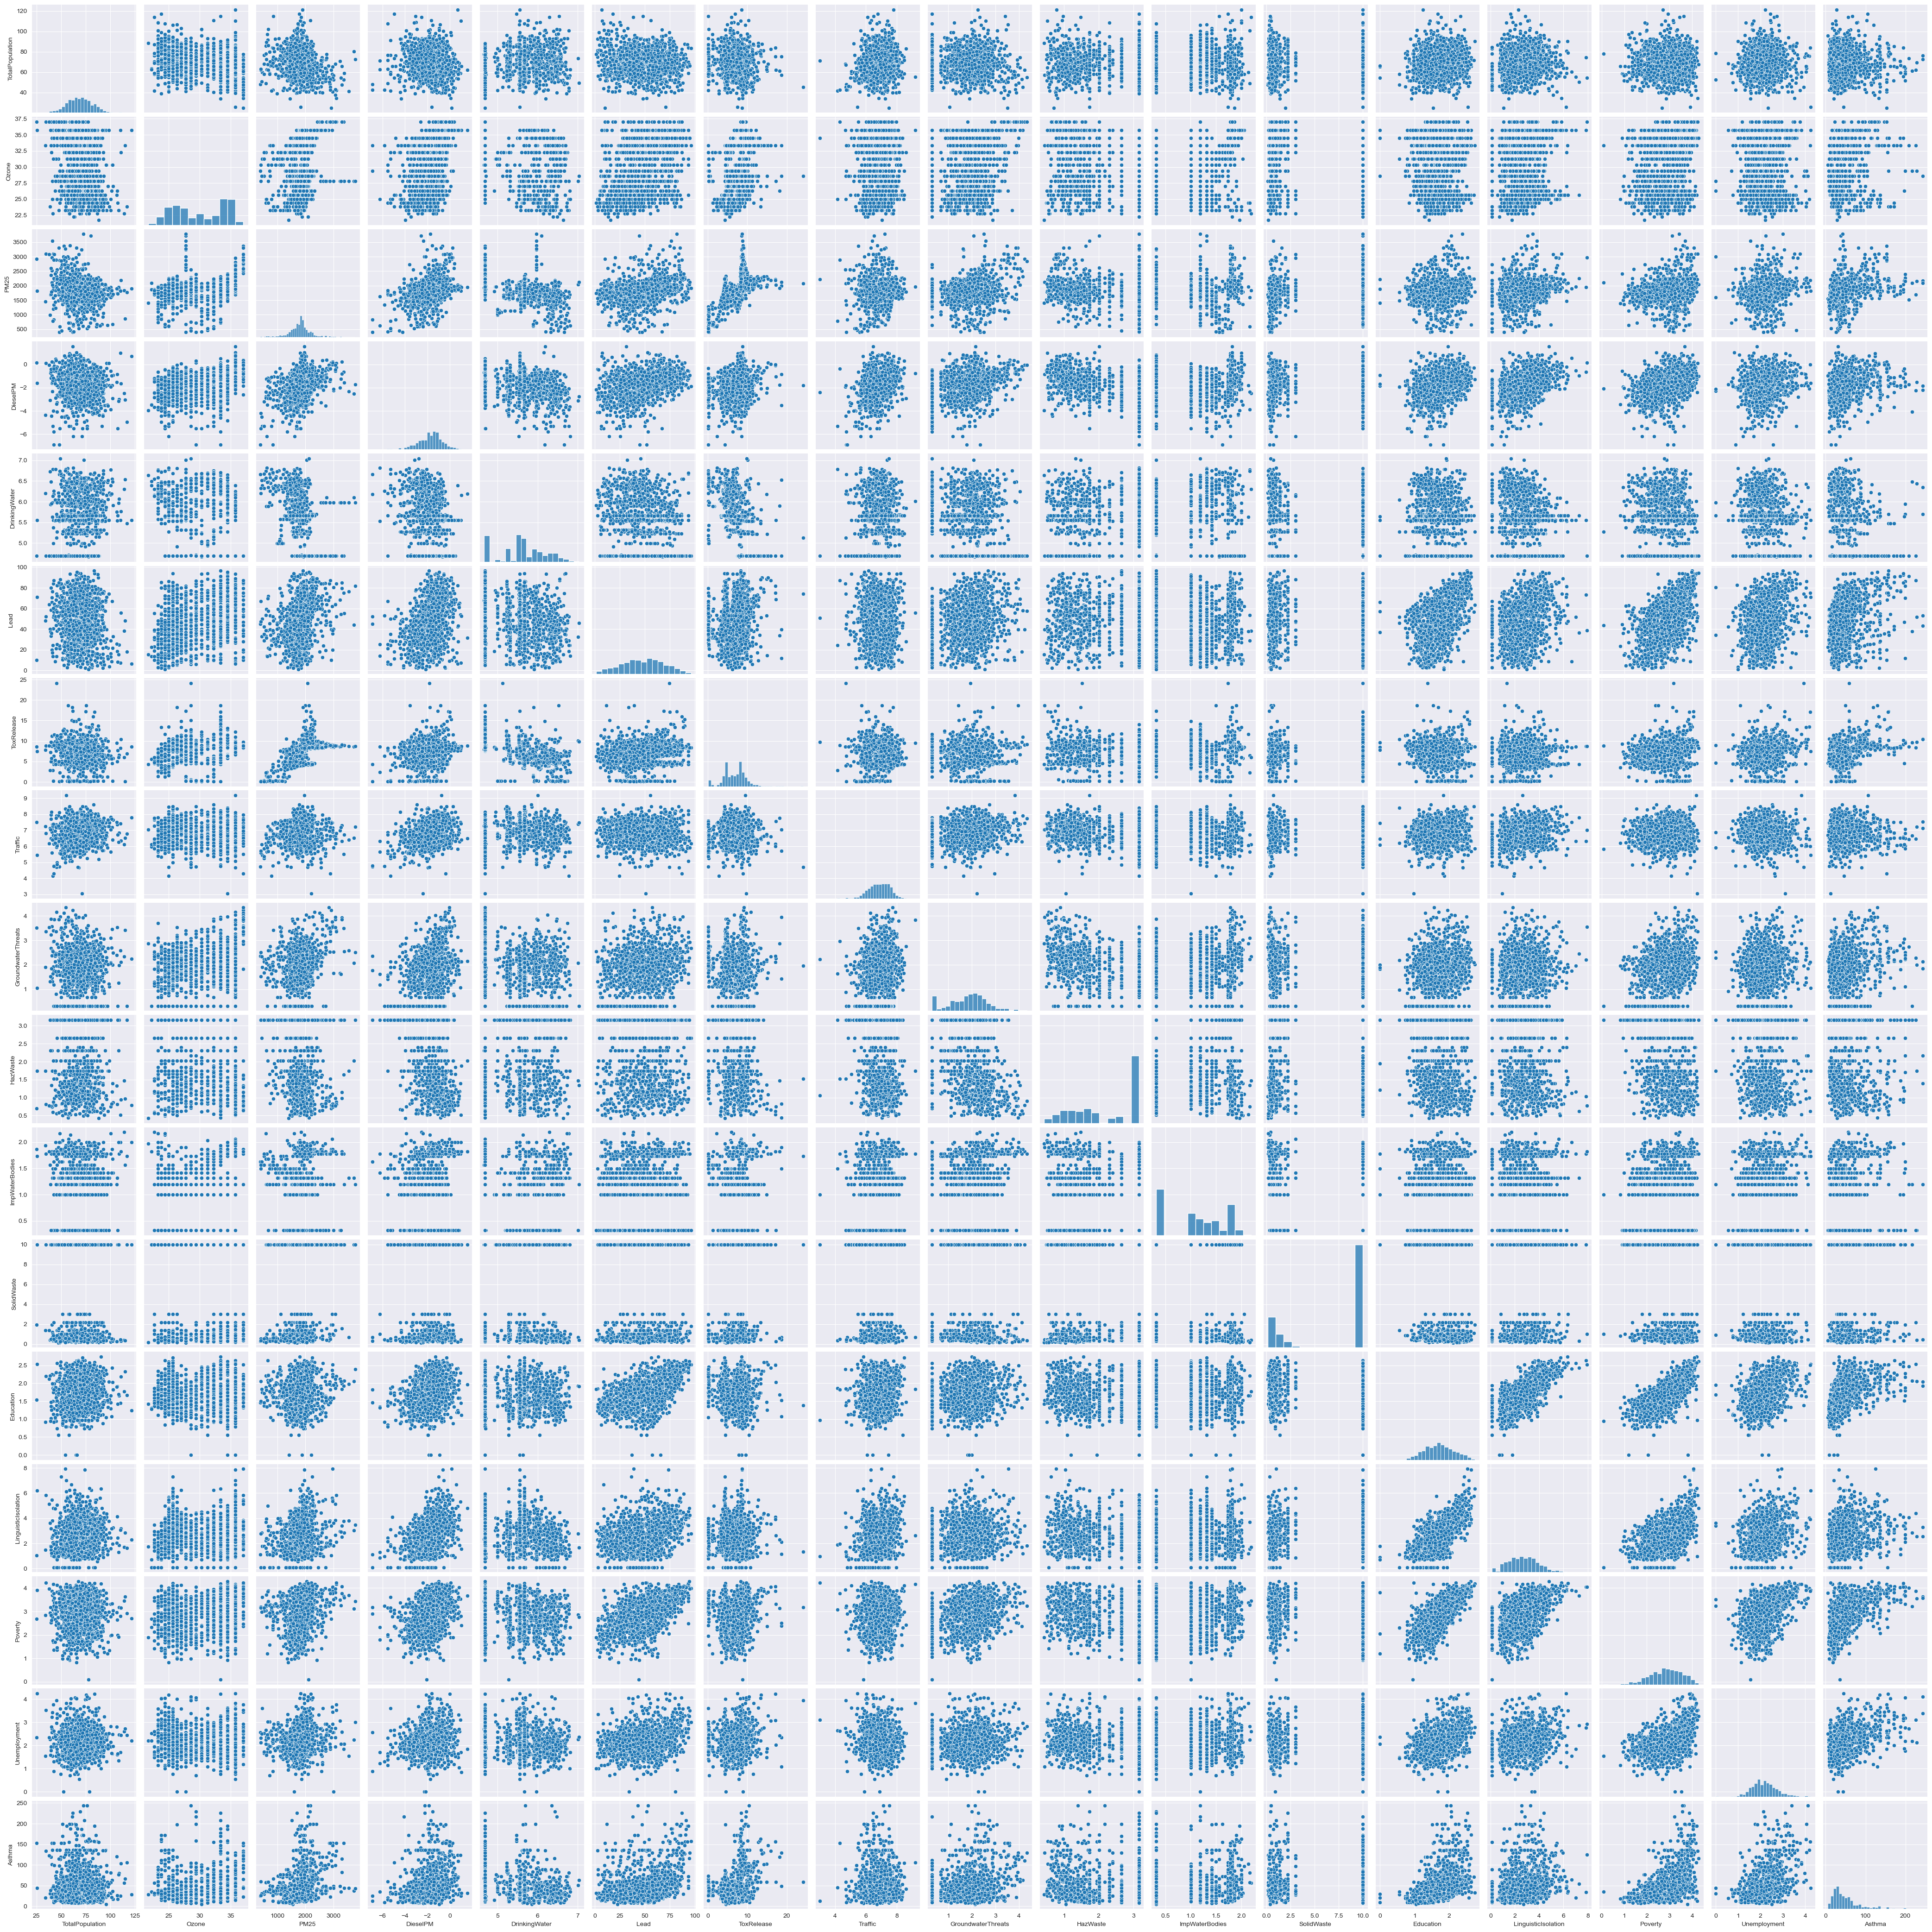

In [6]:
sns.pairplot(Xy_train)

Thoughts on data:  several variables have many values at descrete values mixed with continous values.  
Thoughts on correlation with Asthma:  Could be some linear and some quadratic.  



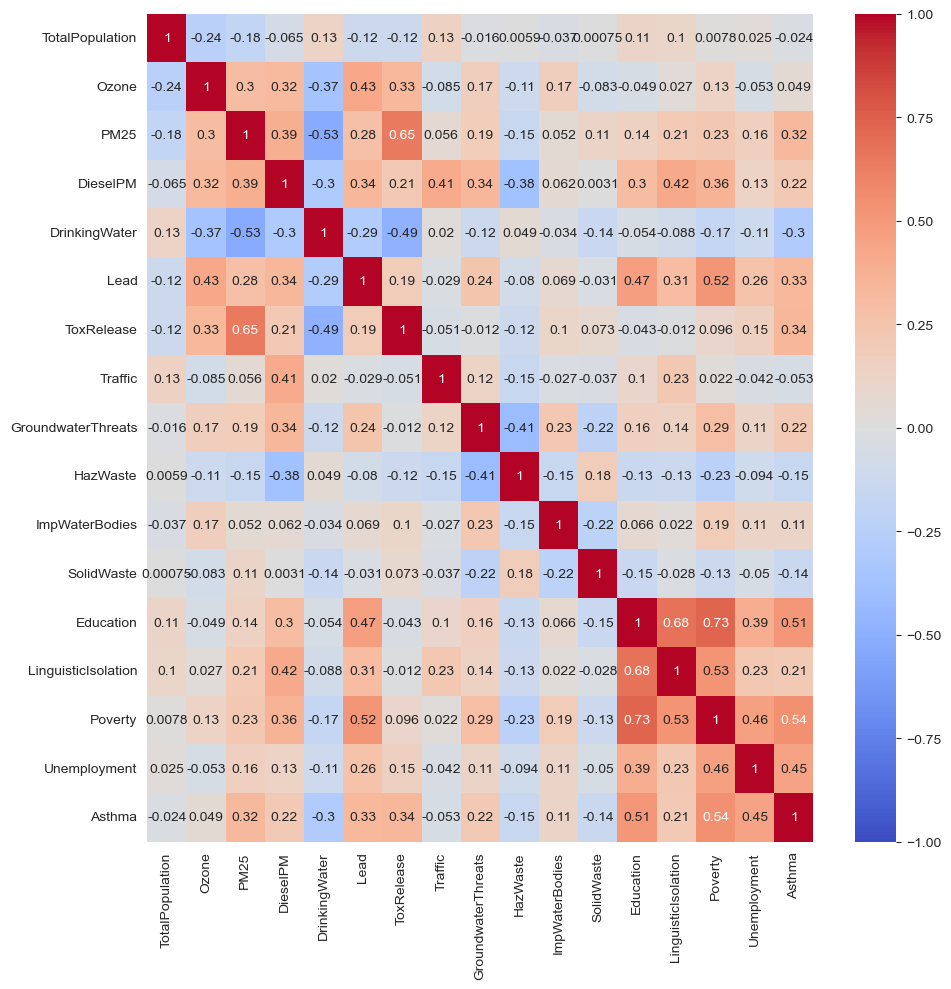

In [7]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(Xy_train.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
fig.tight_layout()

The highest positive correlation with Asthma: Poverty, Education, and Unemployment  
The highest negative correlation with Asthma: DrinkingWater

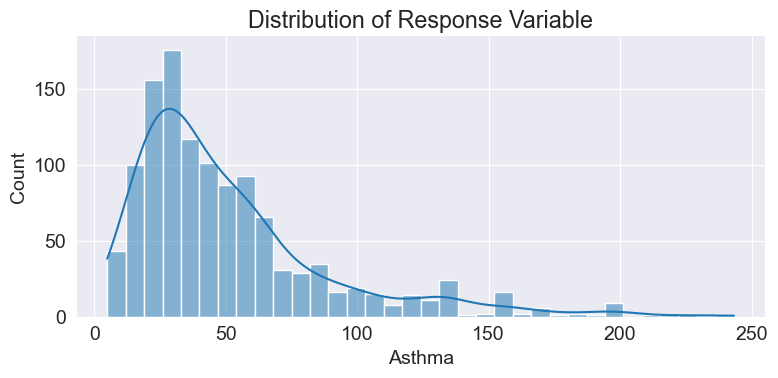

In [28]:
# Take a closer look at the ditribution of y (Asthma)
plt.rc('font',size=14)
fg = sns.displot(data=y_train, kde=True, aspect=2, height=4)
fig, ax = fg.fig, fg.ax
ax.set_title('Distribution of Response Variable')
fig.tight_layout()
fig.savefig('1_asthma_dist.png')

Looks like a transform would help.

In [29]:
yt, lamb, ci = stats.boxcox(y_train, alpha=0.05)
print(lamb)
print(ci)

-0.03754117246650653
(-0.10891884320026549, 0.03391884030892038)


Lets use a log transform

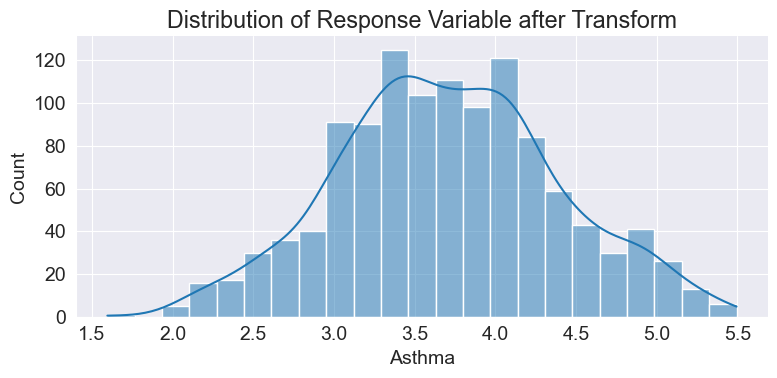

In [30]:
fg = sns.displot(data=y_train.apply(np.log), kde=True, aspect=2, height=4)
fig, ax = fg.fig, fg.ax
ax.set_title('Distribution of Response Variable after Transform')
fig.tight_layout()
# fig.savefig('1_asthma_dist.png')

Not perfectly normal, but it is better. It is mostly symetrical.

In [31]:
import warnings
# turn off warnings becuase the next cell generates a performance warning multiple times due to the line multiplying columns together
warnings.filterwarnings('ignore')

In [32]:
# Build normalized dataframe with quadratic terms and two-factor interactions. The column names are set to match Patsy formulas and to ensure first order terms will always be include if quadratic or interaction terms are included. 

X_poly = X_train.apply(stats.zscore)
for ii in range(len(X_poly.columns)):
    col1 = X_poly.columns[ii]
    X_poly[f'{col1} + I({col1}**2)'] = X_poly[col1] ** 2
    for jj in range(ii+1,len(X_train.columns)):
        col2 = X_poly.columns[jj]
        X_poly[f'{col1}*{col2}'] = X_poly[col1] * X_poly[col2]
X_poly.head()   

TotalPopulation     Ozone      PM25  DieselPM  DrinkingWater   
CensusTract                                                                 
848                 0.432425 -0.349071 -0.566673  0.641662       0.749763  \
891                 0.087955 -0.533100 -0.602173  0.781597       0.609299   
1342                1.236804 -1.318591 -0.684261 -1.747092       1.101216   
379                -0.272026 -1.028564  1.001898  1.027641       0.069018   
949                -0.394138 -1.177203 -0.070900  0.519037       0.046278   

                 Lead  ToxRelease   Traffic  GroundwaterThreats  HazWaste   
CensusTract                                                                 
848          0.011758   -0.781735  0.235300            0.292339  1.014192  \
891         -1.790955   -0.772045  1.084333            1.864795 -1.461179   
1342        -1.500594   -1.056318 -1.239511           -0.677469  1.014192   
379          0.593433   -0.888580  1.335545           -0.458151  1.014192   
949         -0.820703    0.583361  1.364475           -1.904366  1.014192   

             ...  Education + I(Education**2)  Education*LinguisticIsolation   
CensusTract  ...                                                               
848          ...                     0.359826                       0.399550  \
891          ...                     1.511269                       0.377108   
1342         ...                     0.059671                       0.114597   
379          ...                     4.812384                       5.115574   
949          ...                     0.029621                      -0.186808   

             Education*Poverty  Education*Unemployment   
CensusTract                                              
848                   0.299187               -0.551712  \
891                   1.405484               -0.458778   
1342                 -0.257186               -0.199309   
379                   2.573352                0.738516   
949                   0.053722                0.196064   

             LinguisticIsolation + I(LinguisticIsolation**2)   
CensusTract                                                    
848                                                 0.443661  \
891                                                 0.094100   
1342                                                0.220079   
379                                                 5.437867   
949                                                 1.178119   

             LinguisticIsolation*Poverty  LinguisticIsolation*Unemployment   
CensusTract                                                                  
848                             0.332217                         -0.612622  \
891                             0.350712                         -0.114479   
1342                           -0.493918                         -0.382767   
379                             2.735479                          0.785044   
949                            -0.338801                         -1.236491   

             Poverty + I(Poverty**2)  Poverty*Unemployment   
CensusTract                                                  
848                         0.248767             -0.458736  \
891                         1.307104             -0.426665   
1342                        1.108487              0.859033   
379                         1.376063              0.394911   
949                         0.097432              0.355588   

             Unemployment + I(Unemployment**2)  
CensusTract                                     
848                                   0.845928  
891                                   0.139272  
1342                                  0.665716  
379                                   0.113334  
949                                   1.297755  

[5 rows x 152 columns]

In [33]:
# turn warnings back on
warnings.filterwarnings('default')

# Model Selection

## Lasso, minimize BIC

In [34]:
# build dataframe with coefficents for various alphas
coefs = pd.DataFrame(columns=X_poly.columns)
for alpha in np.arange(0.01,2,0.01):
    alpha = np.round(alpha,2)
    lm = Lasso(alpha=alpha, max_iter=10000)
    lm.fit(X_poly, np.log(y_train))
    coefs.loc[alpha] = (lm.coef_)

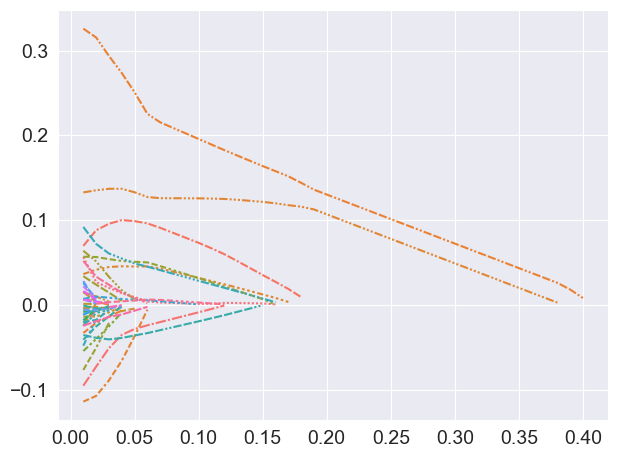

In [35]:
fig, ax = plt.subplots()
sns.lineplot(data=coefs[coefs != 0], ax=ax, legend=False)
fig.tight_layout()

Build formulas for each one, fit model, and find the lowest BIC.

In [36]:
def build_formula(alpha):
    non_zero_coefs = coefs.loc[alpha][coefs.loc[alpha] != 0]
    formula = 'I(np.log(Asthma)) ~ '
    for term in non_zero_coefs.index:
        formula += f'{term} + '
    return formula[:-3]

In [37]:
def mdl(formula):
    return smf.ols(formula, data=Xy_train).fit()

In [38]:
bicmin = 1000000
alpha_best = 0
for alpha in np.arange(0.01,0.4,0.01):
    alpha = np.round(alpha,2)
    bic = mdl(build_formula(alpha)).bic
    if bic <= bicmin:
        bicmin = bic
        alpha_best = alpha

print(f'Best alpha to minimize BIC: {alpha_best}, minimum BIC: {bicmin}')

formula = build_formula(alpha_best)
print(f'\nformula:\n{formula}')

Best alpha to minimize BIC: 0.03, minimum BIC: 1474.858645652484

formula:
I(np.log(Asthma)) ~ PM25 + DrinkingWater + ToxRelease + GroundwaterThreats + SolidWaste + Education + LinguisticIsolation + Poverty + Unemployment + TotalPopulation*DieselPM + TotalPopulation*DrinkingWater + TotalPopulation*Traffic + Ozone + I(Ozone**2) + Ozone*DieselPM + Ozone*ToxRelease + Ozone*GroundwaterThreats + Ozone*Poverty + DieselPM*DrinkingWater + DieselPM*Education + DieselPM*Unemployment + DrinkingWater*Lead + DrinkingWater*GroundwaterThreats + DrinkingWater*LinguisticIsolation + Lead + I(Lead**2) + ToxRelease + I(ToxRelease**2) + Traffic + I(Traffic**2) + HazWaste*SolidWaste + Education + I(Education**2) + LinguisticIsolation + I(LinguisticIsolation**2) + Poverty*Unemployment + Unemployment + I(Unemployment**2)


In [39]:
# I(np.log(Asthma)) ~ PM25 + DrinkingWater + ToxRelease + GroundwaterThreats + SolidWaste + Education + LinguisticIsolation + Poverty + Unemployment + TotalPopulation*DieselPM + TotalPopulation*DrinkingWater + TotalPopulation*Traffic + Ozone + I(Ozone**2) + Ozone*DieselPM + Ozone*ToxRelease + Ozone*GroundwaterThreats + Ozone*Poverty + DieselPM*DrinkingWater + DieselPM*Education + DieselPM*Unemployment + DrinkingWater*Lead + DrinkingWater*GroundwaterThreats + DrinkingWater*LinguisticIsolation + Lead + I(Lead**2) + ToxRelease + I(ToxRelease**2) + Traffic + I(Traffic**2) + HazWaste*SolidWaste + Education + I(Education**2) + LinguisticIsolation + I(LinguisticIsolation**2) + Poverty*Unemployment + Unemployment + I(Unemployment**2)

In [40]:
model = mdl(formula)
print(model.summary2())

                         Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:         0.644    
Dependent Variable:       I(np.log(Asthma))     AIC:                    1281.8496
Date:                     2023-08-31 05:07      BIC:                    1474.8586
No. Observations:         1187                  Log-Likelihood:         -602.92  
Df Model:                 37                    F-statistic:            58.97    
Df Residuals:             1149                  Prob (F-statistic):     3.00e-236
R-squared:                0.655                 Scale:                  0.16705  
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
Intercept                          1.4587   1.7593  0.8291 0.4072 -1.9931  4.9106
PM25                               0.0001

Now use backward elimination

In [41]:
model = mdl(formula + ' - I(Education ** 2) - I(Unemployment ** 2) - TotalPopulation:DieselPM - DieselPM:Education - DieselPM:DrinkingWater' \
                     + ' - HazWaste:SolidWaste - I(ToxRelease ** 2) - PM25 - I(Traffic ** 2) - HazWaste - DrinkingWater:Lead' \
                     + ' - TotalPopulation:Traffic - Traffic - SolidWaste')
print(f'{model.bic}\n')
print(f'{model.pvalues.sort_values(ascending=False)}\n')

# used to check how many times a parameter is used to ensure we don't removed first order terms that are used in interactions or quadratics
for col in X_train.columns.sort_values():
    counter = 0
    for param in model.params.index:
        if col in param:
            counter += 1
    if counter > 0:
        print(f'{counter} {col}')

1400.4371633025148

DrinkingWater                        5.914754e-01
GroundwaterThreats                   1.936050e-01
DieselPM                             1.638444e-01
Ozone                                3.222603e-02
Intercept                            7.610876e-03
TotalPopulation:DrinkingWater        5.594198e-03
TotalPopulation                      4.104577e-03
Ozone:DieselPM                       6.701702e-04
DieselPM:Unemployment                4.156948e-04
Unemployment                         3.855885e-04
Ozone:GroundwaterThreats             3.374353e-04
LinguisticIsolation                  2.351104e-04
Poverty:Unemployment                 1.363858e-04
I(LinguisticIsolation ** 2)          1.176104e-04
I(Ozone ** 2)                        3.466523e-05
DrinkingWater:LinguisticIsolation    2.436915e-05
DrinkingWater:GroundwaterThreats     1.511987e-05
Poverty                              2.559932e-06
Ozone:ToxRelease                     2.863943e-08
Ozone:Poverty                 

The BIC increased when the next term was removed, but I will keep going to see if it was just a local minimum.

In [42]:
model = mdl(formula + ' - I(Education ** 2) - I(Unemployment ** 2) - TotalPopulation:DieselPM - DieselPM:Education - DieselPM:DrinkingWater' \
                     + ' - HazWaste:SolidWaste - I(ToxRelease ** 2) - PM25 - I(Traffic ** 2) - HazWaste - DrinkingWater:Lead' \
                     + ' - TotalPopulation:Traffic - Traffic - SolidWaste - TotalPopulation:DrinkingWater - TotalPopulation')
print(f'{model.bic}\n')
print(f'{model.pvalues.sort_values(ascending=False)}\n')

# used to check how many times a parameter is used to ensure we don't removed first order terms that are used in interactions or quadratics
for col in X_train.columns.sort_values():
    counter = 0
    for param in model.params.index:
        if col in param:
            counter += 1
    if counter > 0:
        print(f'{counter} {col}')

1395.3512859288135

DieselPM                             2.343299e-01
GroundwaterThreats                   1.863500e-01
Intercept                            6.581182e-02
Ozone                                7.946625e-03
Ozone:DieselPM                       1.269913e-03
LinguisticIsolation                  1.055057e-03
DrinkingWater                        7.639779e-04
Unemployment                         4.640796e-04
DieselPM:Unemployment                3.084548e-04
I(LinguisticIsolation ** 2)          2.969193e-04
Poverty:Unemployment                 1.598115e-04
Ozone:GroundwaterThreats             1.436515e-04
DrinkingWater:LinguisticIsolation    1.110500e-04
DrinkingWater:GroundwaterThreats     7.237209e-06
Poverty                              4.638291e-06
I(Ozone ** 2)                        3.814964e-06
Ozone:ToxRelease                     6.087685e-08
Ozone:Poverty                        1.842626e-08
I(Lead ** 2)                         4.142466e-09
Lead                          

This is the new lowest BIC, but lets keep going to make sure.

In [43]:
model = mdl(formula + ' - I(Education ** 2) - I(Unemployment ** 2) - TotalPopulation:DieselPM - DieselPM:Education - DieselPM:DrinkingWater' \
                     + ' - HazWaste:SolidWaste - I(ToxRelease ** 2) - PM25 - I(Traffic ** 2) - HazWaste - DrinkingWater:Lead' \
                     + ' - TotalPopulation:Traffic - Traffic - SolidWaste - TotalPopulation:DrinkingWater - TotalPopulation - Ozone:DieselPM' \
                     + ' - Poverty:Unemployment - DieselPM:Unemployment - DieselPM - Unemployment - I(LinguisticIsolation ** 2)' \
                     + ' - DrinkingWater:LinguisticIsolation')
print(f'{model.bic}\n')
print(f'{model.pvalues.sort_values(ascending=False)}\n')

# used to check how many times a parameter is used to ensure we don't removed first order terms that are used in interactions or quadratics
for col in X_train.columns.sort_values():
    counter = 0
    for param in model.params.index:
        if col in param:
            counter += 1
    if counter > 0:
        print(f'{counter} {col}')

1420.4983664661536

DrinkingWater                       1.588266e-01
GroundwaterThreats                  1.348273e-01
Ozone:GroundwaterThreats            3.168759e-05
Intercept                           9.242305e-06
Ozone:Poverty                       3.467313e-06
DrinkingWater:GroundwaterThreats    9.858570e-07
Ozone                               2.240063e-07
Ozone:ToxRelease                    7.090005e-08
Poverty                             8.803054e-10
I(Ozone ** 2)                       2.895949e-10
ToxRelease                          7.919258e-11
I(Lead ** 2)                        2.091314e-11
Lead                                2.412939e-12
LinguisticIsolation                 7.652253e-24
Education                           4.658708e-58
dtype: float64

2 DrinkingWater
1 Education
3 GroundwaterThreats
2 Lead
1 LinguisticIsolation
5 Ozone
2 Poverty
2 ToxRelease


I tried several more terms and the BIC fluctated a little, but then was steadily increased for the last few terms removed.

In [44]:
# save the lowest BIC model
model1 = mdl(formula + ' - I(Education ** 2) - I(Unemployment ** 2) - TotalPopulation:DieselPM - DieselPM:Education - DieselPM:DrinkingWater' \
                     + ' - HazWaste:SolidWaste - I(ToxRelease ** 2) - PM25 - I(Traffic ** 2) - HazWaste - DrinkingWater:Lead' \
                     + ' - TotalPopulation:Traffic - Traffic - SolidWaste - TotalPopulation:DrinkingWater - TotalPopulation')
print(f'{model1.summary2()}')


                         Results: Ordinary least squares
Model:                    OLS                   Adj. R-squared:         0.639    
Dependent Variable:       I(np.log(Asthma))     AIC:                    1283.6092
Date:                     2023-08-31 05:07      BIC:                    1395.3513
No. Observations:         1187                  Log-Likelihood:         -619.80  
Df Model:                 21                    F-statistic:            100.8    
Df Residuals:             1165                  Prob (F-statistic):     2.50e-244
R-squared:                0.645                 Scale:                  0.16951  
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
Intercept                          2.3300   1.2653  1.8414 0.0658 -0.1526  4.8125
DrinkingWater                      0.2325

Only two terms and the intercept are not significate (with $\alpha=0.05$)

In [45]:
# try without the intercept
model2 = mdl(formula + ' - I(Education ** 2) - I(Unemployment ** 2) - TotalPopulation:DieselPM - DieselPM:Education - DieselPM:DrinkingWater' \
                     + ' - HazWaste:SolidWaste - I(ToxRelease ** 2) - PM25 - I(Traffic ** 2) - HazWaste - DrinkingWater:Lead' \
                     + ' - TotalPopulation:Traffic - Traffic - SolidWaste - TotalPopulation:DrinkingWater - TotalPopulation -1')
print(f'{model2.summary2()}')

                         Results: Ordinary least squares
Model:                   OLS               Adj. R-squared (uncentered): 0.988    
Dependent Variable:      I(np.log(Asthma)) AIC:                         1285.0591
Date:                    2023-08-31 05:07  BIC:                         1391.7220
No. Observations:        1187              Log-Likelihood:              -621.53  
Df Model:                21                F-statistic:                 4672.    
Df Residuals:            1166              Prob (F-statistic):          0.00     
R-squared (uncentered):  0.988             Scale:                       0.16986  
---------------------------------------------------------------------------------
                                   Coef.  Std.Err.    t    P>|t|   [0.025  0.975]
---------------------------------------------------------------------------------
DrinkingWater                      0.2875   0.0622  4.6254 0.0000  0.1656  0.4095
ToxRelease                         0.2844

Without the intercept all parameters are now significant (with $\alpha=0.05$) and the BIC improved.

In [46]:
# Check the rmse
rmse_train1 = np.sqrt(mean_squared_error(y_train, np.exp(model1.predict(X_train))))
rmse_train2 = np.sqrt(mean_squared_error(y_train, np.exp(model2.predict(X_train))))

rmse_val1 = np.sqrt(mean_squared_error(y_val, np.exp(model1.predict(X_val))))
rmse_val2 = np.sqrt(mean_squared_error(y_val, np.exp(model2.predict(X_val))))

print(f'    RMSE Train   Val')
print(f'Model 1: {rmse_train1:.2f}  {rmse_val1:.2f}')
print(f'Model 2: {rmse_train2:.2f}  {rmse_val2:.2f}')

    RMSE Train   Val
Model 1: 24.80  30.26
Model 2: 24.76  30.10


***
# Explore untransformed data

In [18]:
df_raw = pd.read_csv('Student_Data_Untransformed.csv')
df_raw.set_index('CensusTract', inplace=True)
df_trans = pd.read_csv('Student_Data.csv')
df_trans.set_index('CensusTract', inplace=True)

In [19]:
X_raw = df_raw.drop('Asthma', axis=1)
X_trans = df_trans.drop('Asthma', axis=1)
columns = X_raw.columns

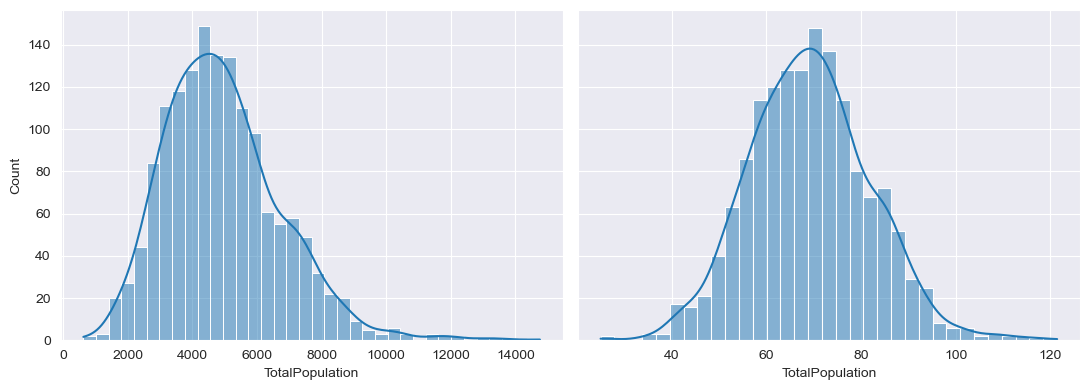

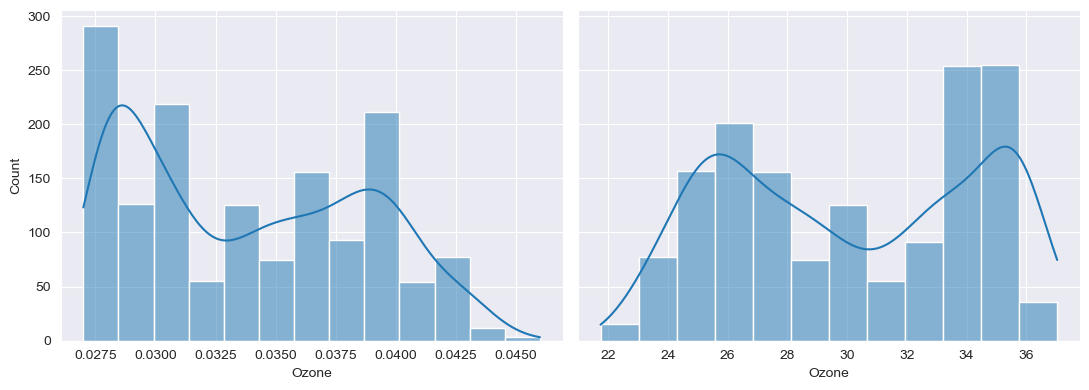

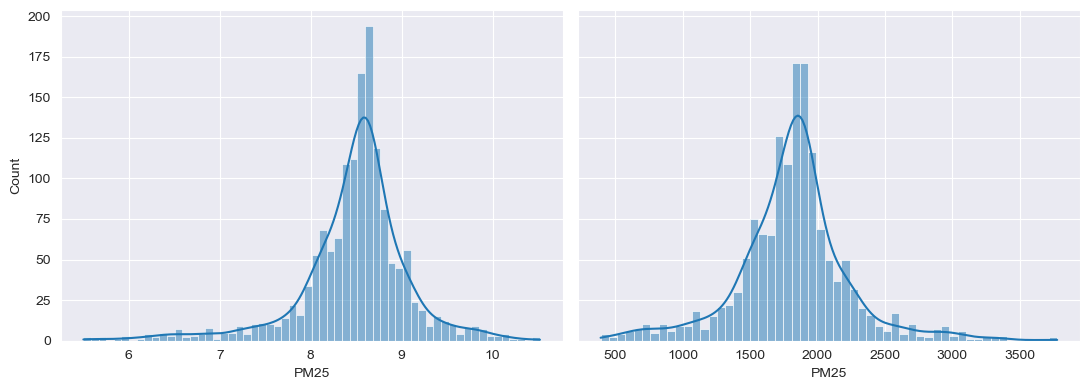

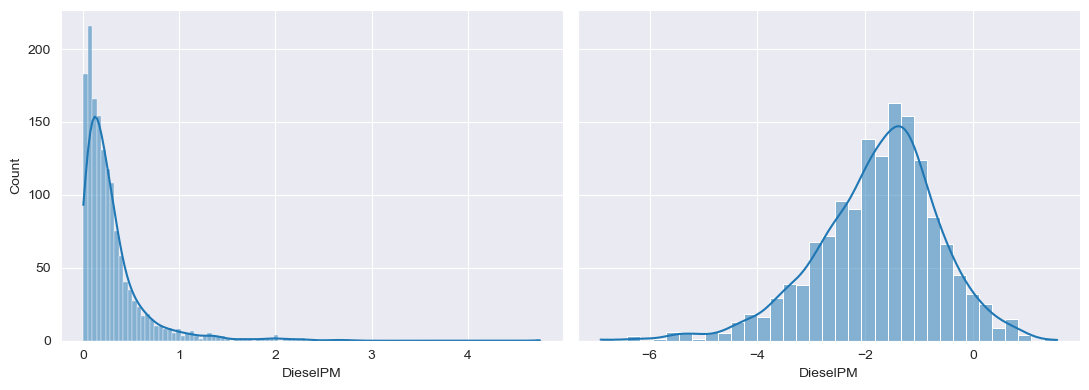

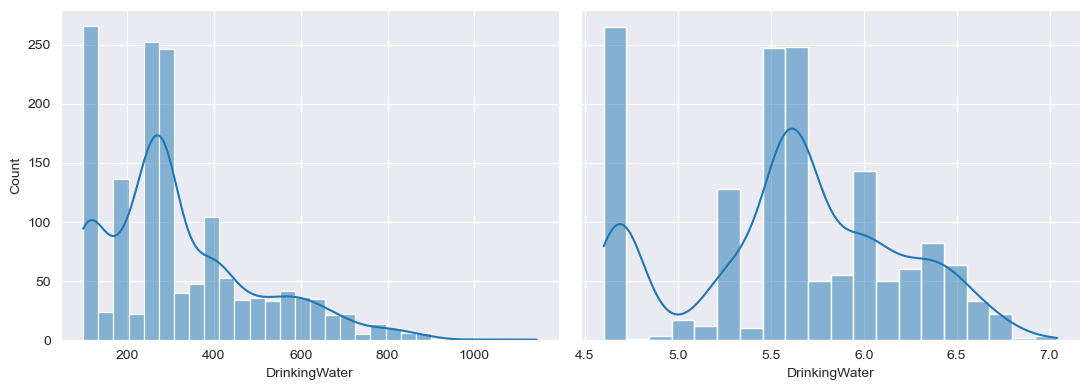

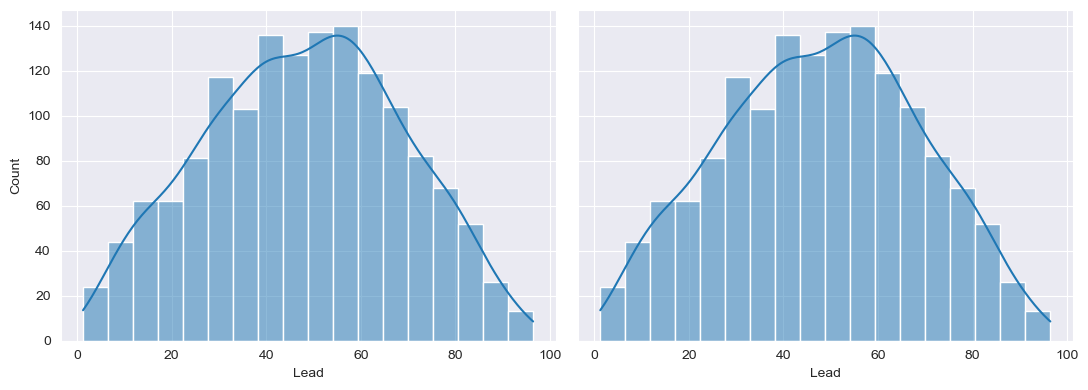

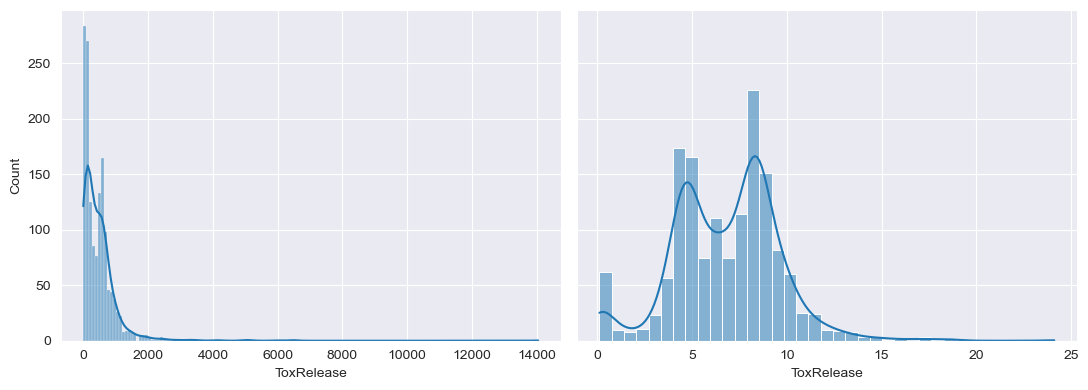

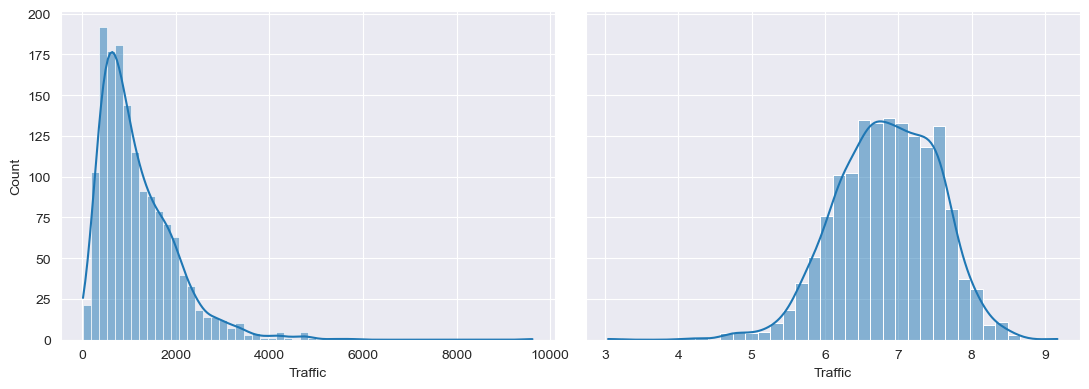

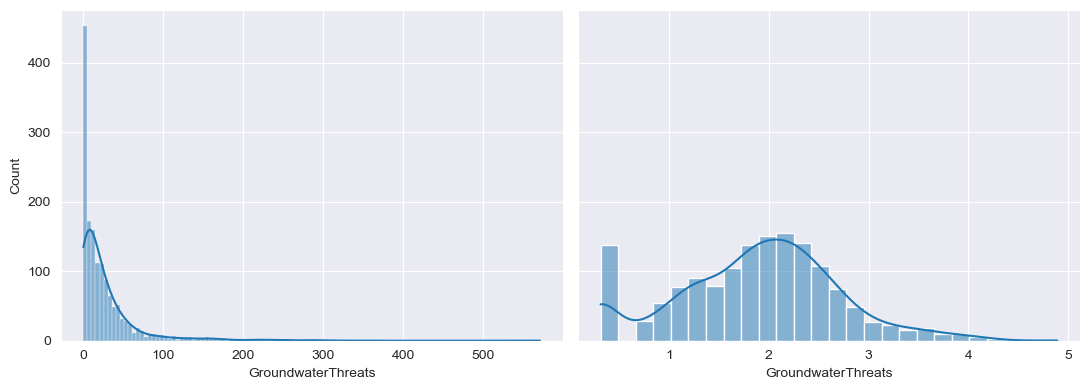

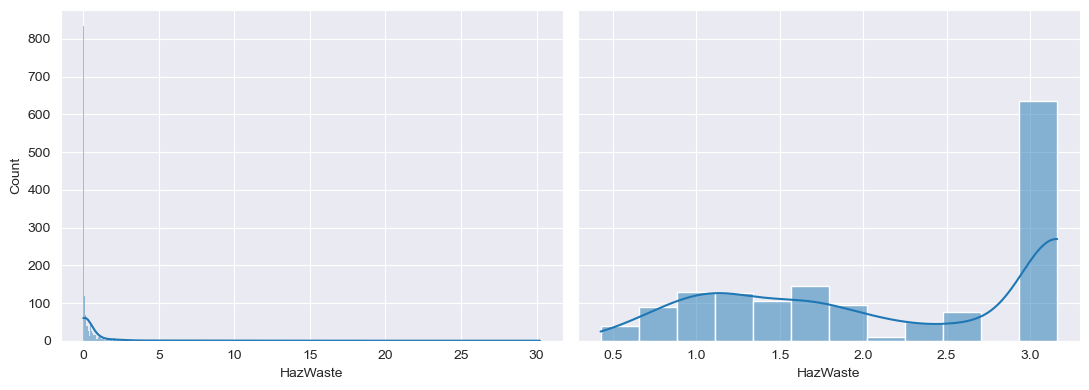

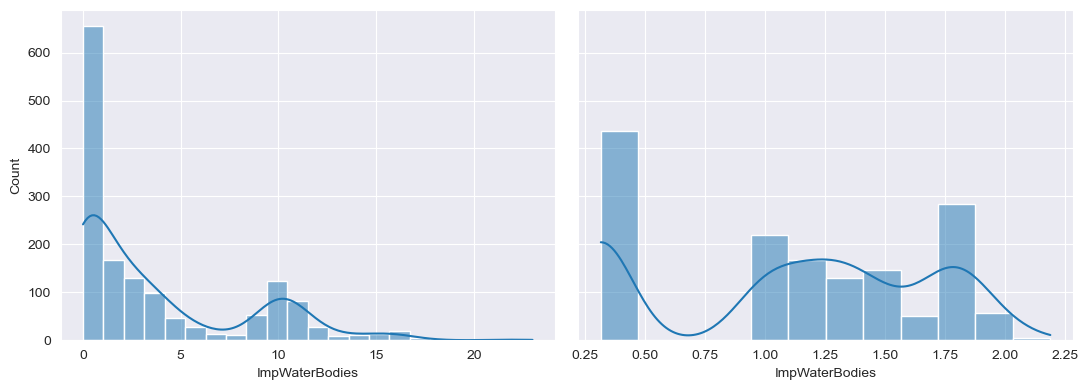

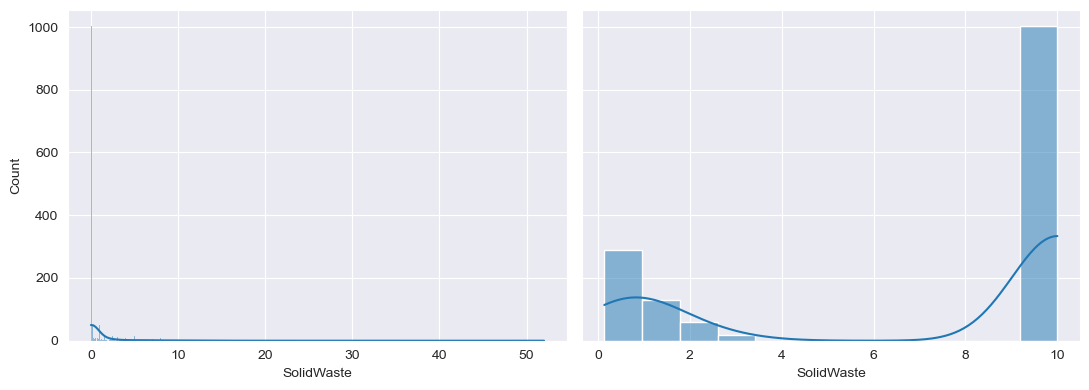

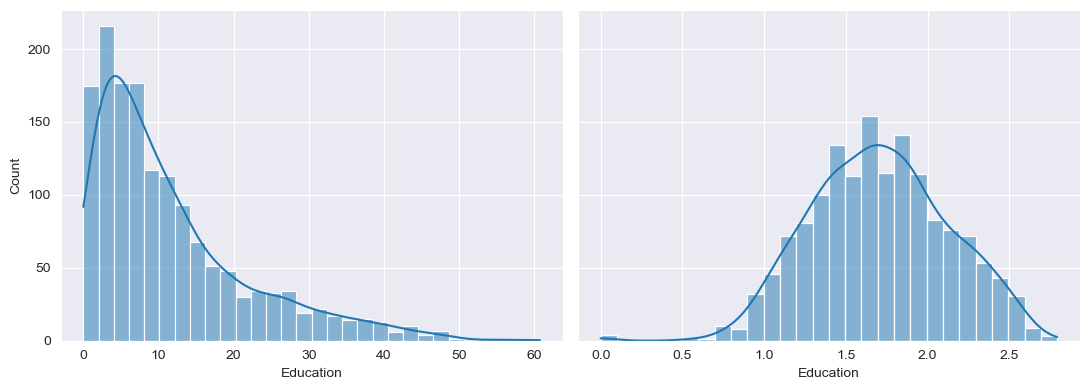

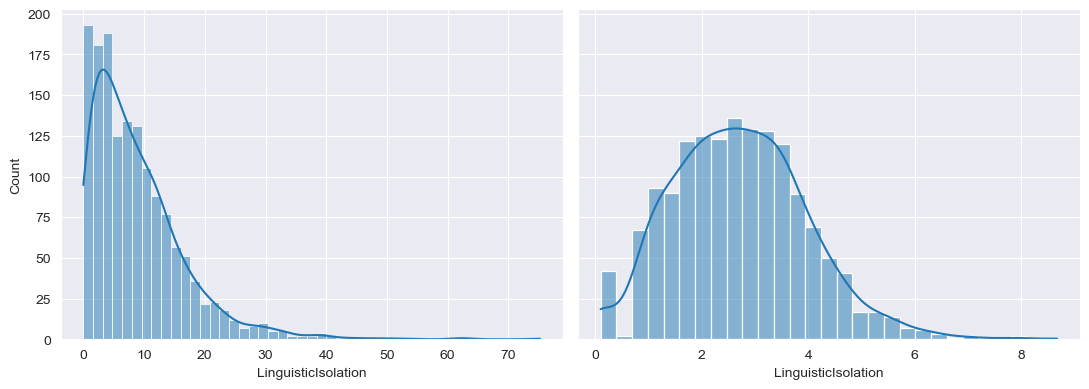

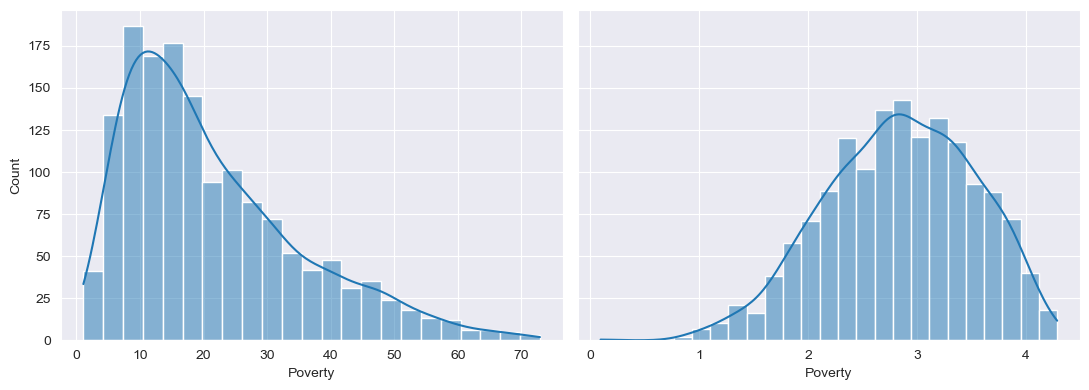

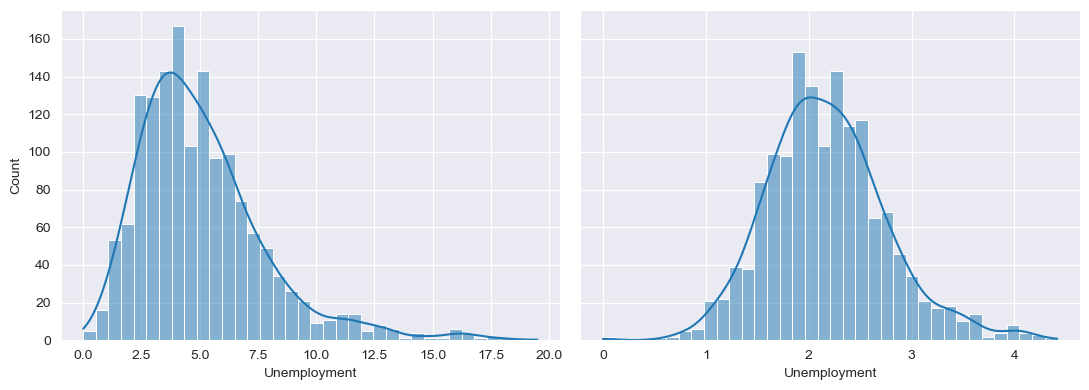

In [20]:
for col in columns:
    fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2,figsize=(11,4),sharey=True)
    sns.histplot(data=X_raw, x=col, kde=True, ax=ax1)
    sns.histplot(data=X_trans, x=col, kde=True, ax=ax2)
    fig.tight_layout()    

In [16]:
for col in columns:
    if X[col].min() <= 0:
        _, lamb, ci = stats.boxcox(X[col]+.0001, alpha=.05)
    else:
        _, lamb, ci = stats.boxcox(X[col], alpha=.05)
    print(f'{col:20}: {lamb:6.3}  {ci}') 

CensusTract         :    0.7  (0.6400380252192199, 0.7614614871053413)
TotalPopulation     :  0.336  (0.23497322950779168, 0.438284403402039)
Ozone               : -0.636  (-1.065581126448225, -0.20923103970035128)
PM25                :   3.59  (3.1802604494513873, 4.008751769662824)
DieselPM            :  0.158  (0.12424258786594977, 0.19216808152990045)
DrinkingWater       :  0.128  (0.04428199291210969, 0.21251134232060837)
Lead                :  0.896  (0.8100140737737682, 0.9847392751092865)
ToxRelease          :  0.308  (0.28851495507296837, 0.32883411796026707)
Traffic             :  0.154  (0.09591296570806208, 0.21372117503915167)
GroundwaterThreats  :  0.248  (0.23281788350003796, 0.2637241448781409)
HazWaste            : -0.00247  (-0.019472016120778642, 0.014357195364742056)
ImpWaterBodies      :  0.187  (0.17071579275503312, 0.2025160456287203)
SolidWaste          : -0.229  (-0.2485754221256614, -0.20888992046349075)
Education           :  0.264  (0.22949466944755262, 0.29